## Extended downstream shelf experiment

CNTDIFF_EXT_SHELF

|Run|Description|
|:---:|:--------:|
|run01| canyon case|
|run02 | no canyon case|

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import seaborn as sns
import xarray as xr

import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('dark')

### Velocity fields

In [50]:
extGr = Dataset('/data/kramosmu/results/TracerExperiments/CNTDIFF_EXT_SHELF/run01/gridGlob.nc')
baseGr = Dataset('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc')

nx = 360
ny = 360

nx_ext = 540
ny_ext = 360

RC = baseGr.variables['RC'][:]
hFacmasked = np.ma.masked_values(baseGr.variables['HFacC'], 0)
mask = np.ma.getmask(hFacmasked)

hFacmasked_ext = np.ma.masked_values(extGr.variables['HFacC'], 0)
mask_ext = np.ma.getmask(hFacmasked_ext)

X = (baseGr.variables['X'][:])/1000
Y = (baseGr.variables['Y'][:])/1000
dep = baseGr.variables['Depth']

X_ext = (extGr.variables['X'][:])/1000
Y_ext = (extGr.variables['Y'][:])/1000
dep_ext = extGr.variables['Depth']

In [12]:
def get_vel(path, tt, zz, xini=0, xend=360, yini=0, yend=360):
    with Dataset(path,'r') as state:
        u_stag = state.variables['U'][tt,zz,yini:yend,xini:xend+1]
        v_stag = state.variables['V'][tt,zz,yini:yend+1,xini:xend]
    uu,vv = rout.unstagger(u_stag,v_stag)
    spd = np.sqrt(uu**2+vv**2)
    
    spd_masked = np.ma.masked_array(spd, mask = mask_ext[zz,yini:yend,xini:xend])
    uu_masked = np.ma.masked_array(uu, mask = mask_ext[zz,yini:yend,xini:xend])
    vv_masked = np.ma.masked_array(vv, mask = mask_ext[zz,yini:yend,xini:xend])

    return(uu_masked,vv_masked,spd_masked)


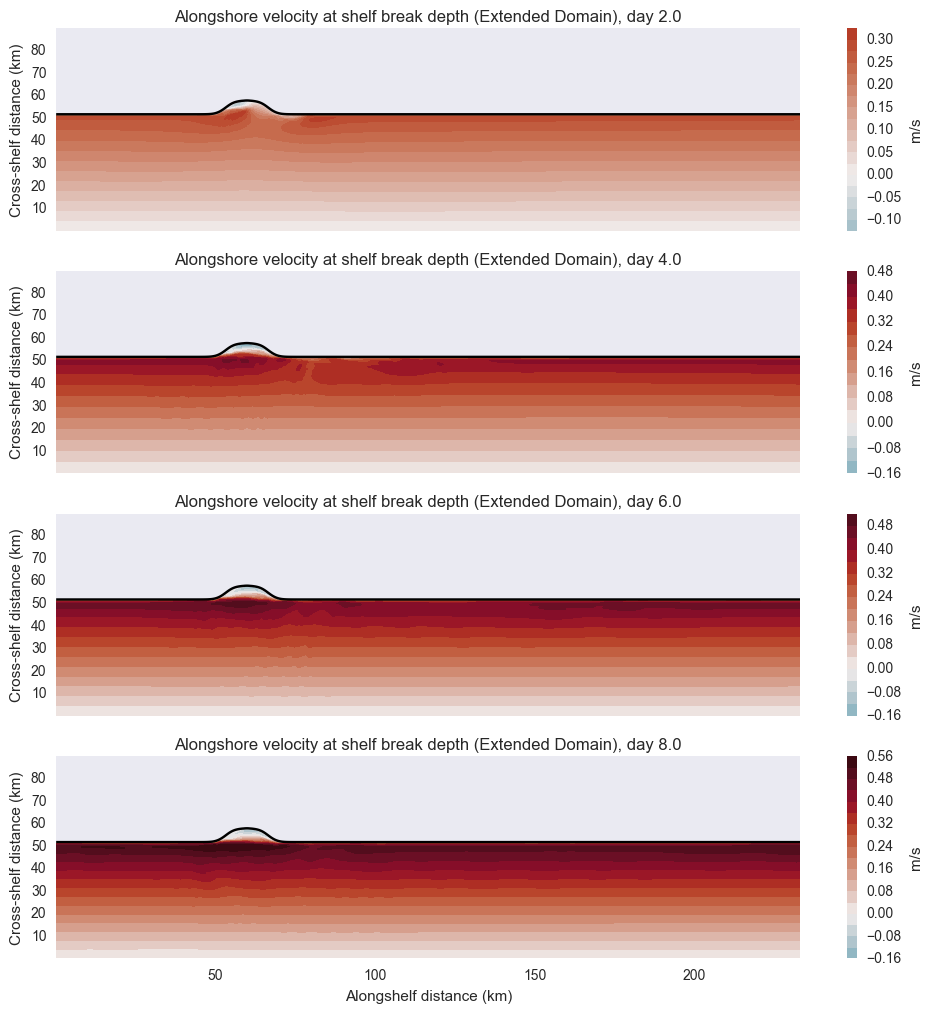

In [39]:
state_base_path = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
state_ext_path = '/data/kramosmu/results/TracerExperiments/CNTDIFF_EXT_SHELF/run01/stateGlob.nc'

fig, ax = plt.subplots(4,1,figsize=(12,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,30,xend=540)
    CF = ax[ii].contourf(X_ext,Y_ext,u_ext,20, cmap = cmo.cm.balance, vmin=-0.54, vmax=0.54)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X_ext,Y_ext,dep_ext[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_title('Alongshore velocity at shelf break depth (Extended Domain), day %1.1f' %(tt/2.))
    ax[ii].set_ylabel('Cross-shelf distance (km)') 

ax[3].set_xlabel('Alongshelf distance (km)')    



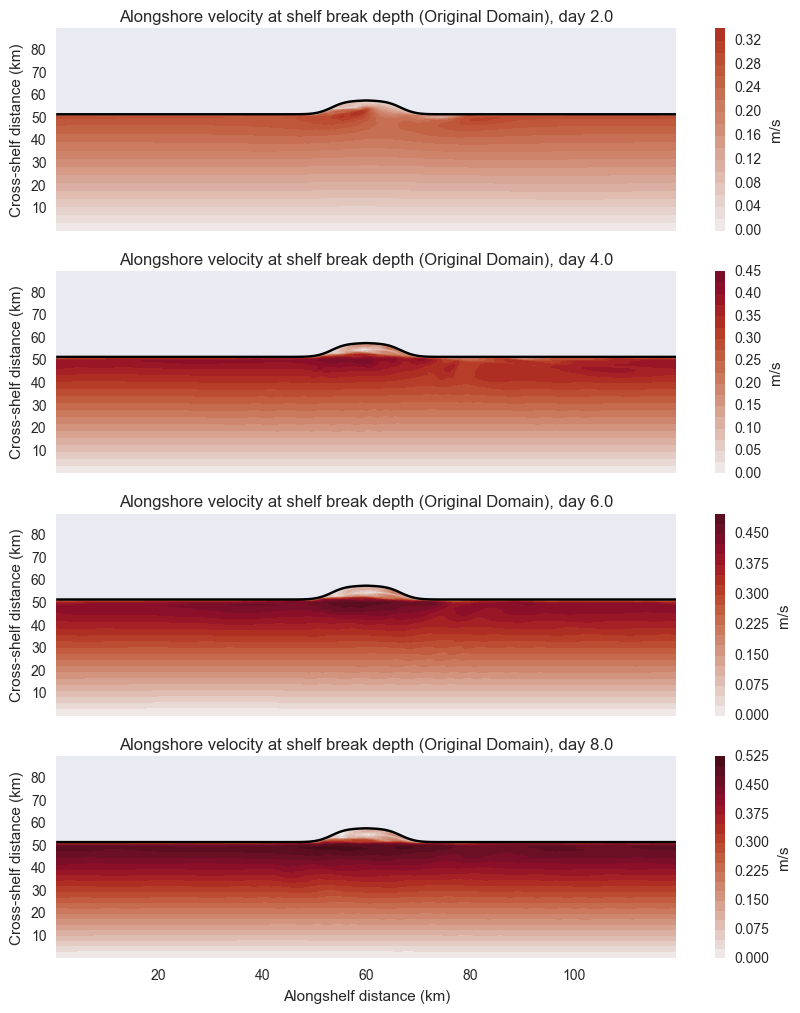

In [38]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,30)
    CF = ax[ii].contourf(X,Y,spd_base,20, cmap = cmo.cm.balance, vmin=-0.54, vmax=0.54)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_title('Alongshore velocity at shelf break depth (Original Domain), day %1.1f' %(tt/2.))
    ax[ii].set_ylabel('Cross-shelf distance (km)') 

ax[3].set_xlabel('Alongshelf distance (km)')    


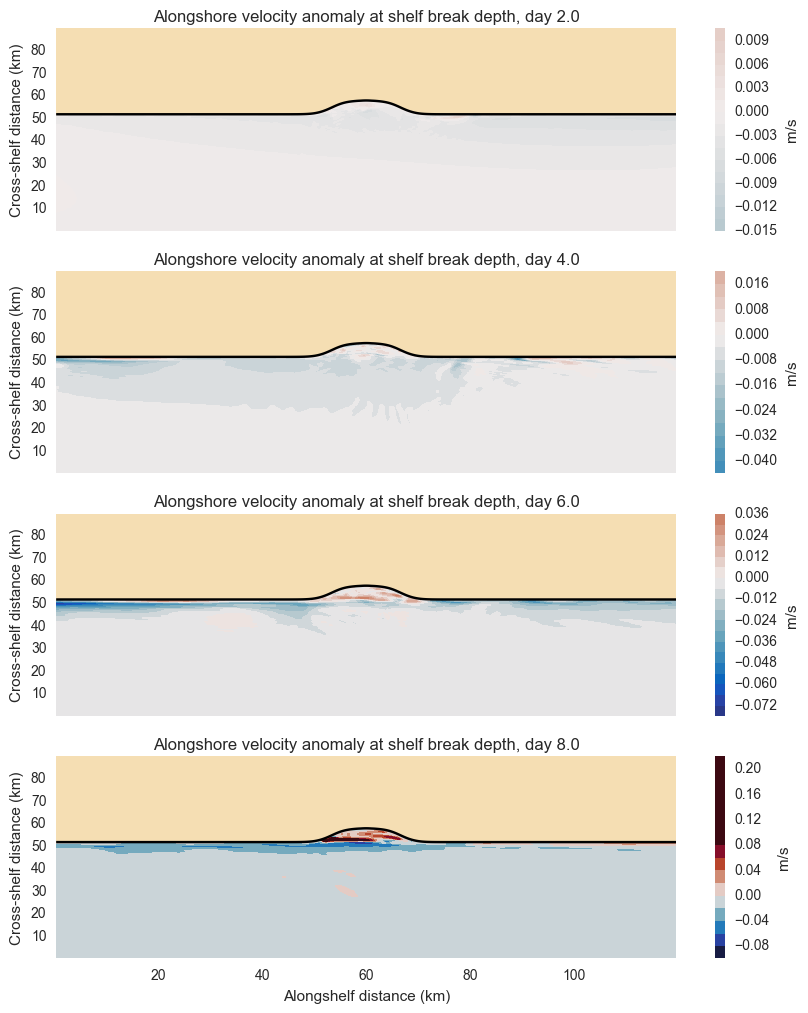

In [49]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,30)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,30)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X,Y,u_base-u_ext[:,:360],20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('Alongshore velocity anomaly at shelf break depth, day %1.1f' %(tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


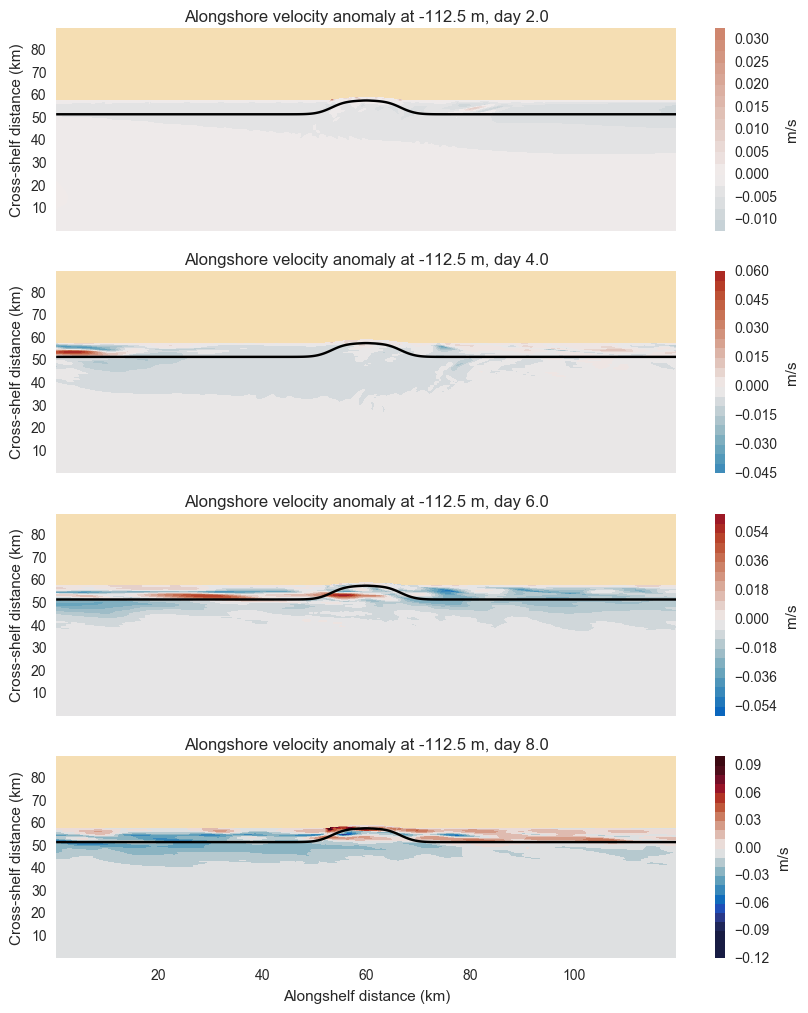

In [62]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,22)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,22)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X,Y,u_base-u_ext[:,:360],20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('Alongshore velocity anomaly at %1.1f m, day %1.1f' %(RC[22],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


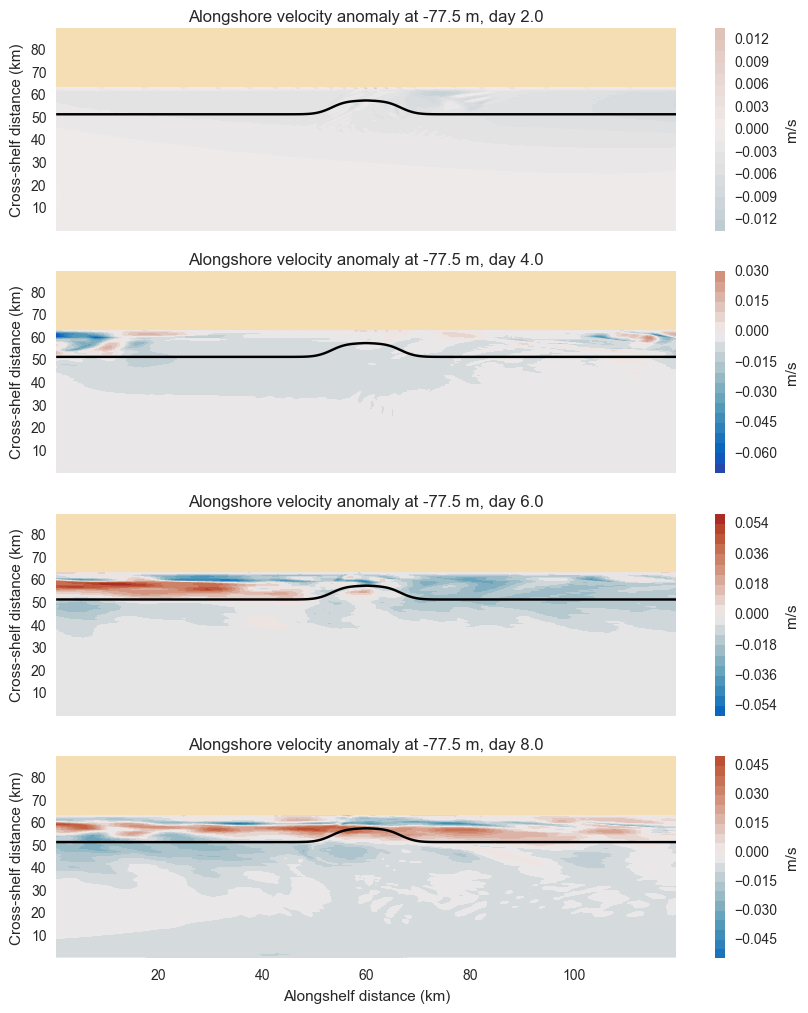

In [63]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,15)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,15)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X,Y,u_base-u_ext[:,:360],20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('Alongshore velocity anomaly at %1.1f m, day %1.1f' %(RC[15],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


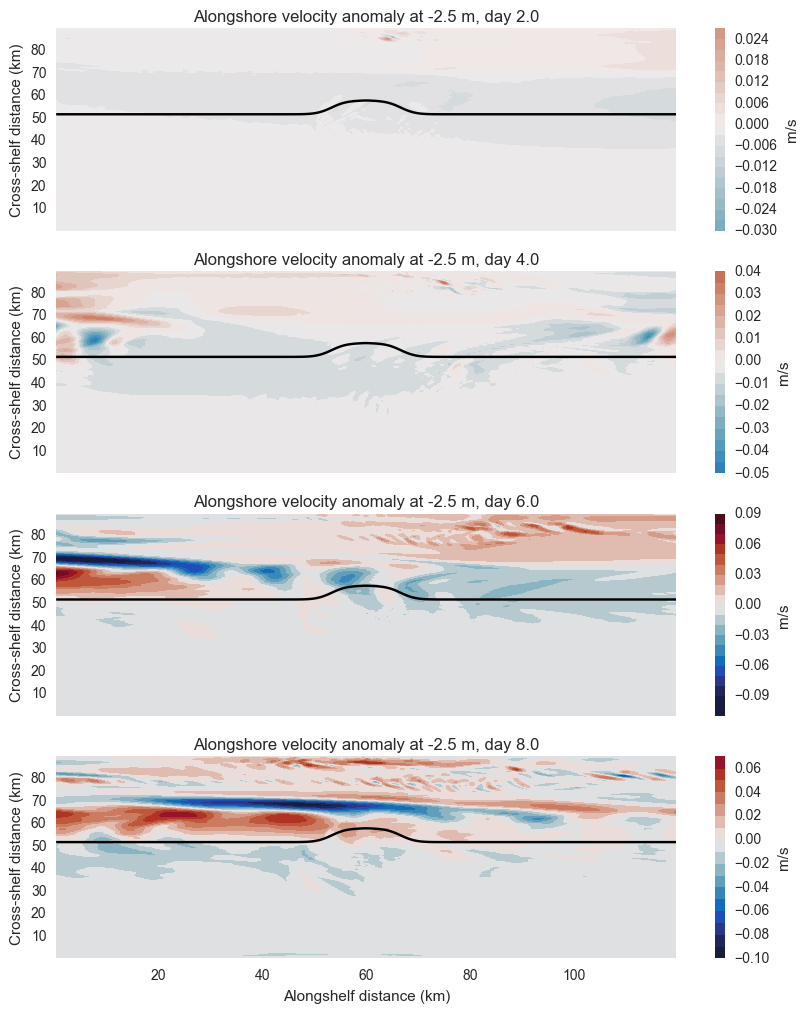

In [55]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,0)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,0)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X,Y,u_base-u_ext[:,:360],20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('Alongshore velocity anomaly at %1.1f m, day %1.1f' %(RC[0],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


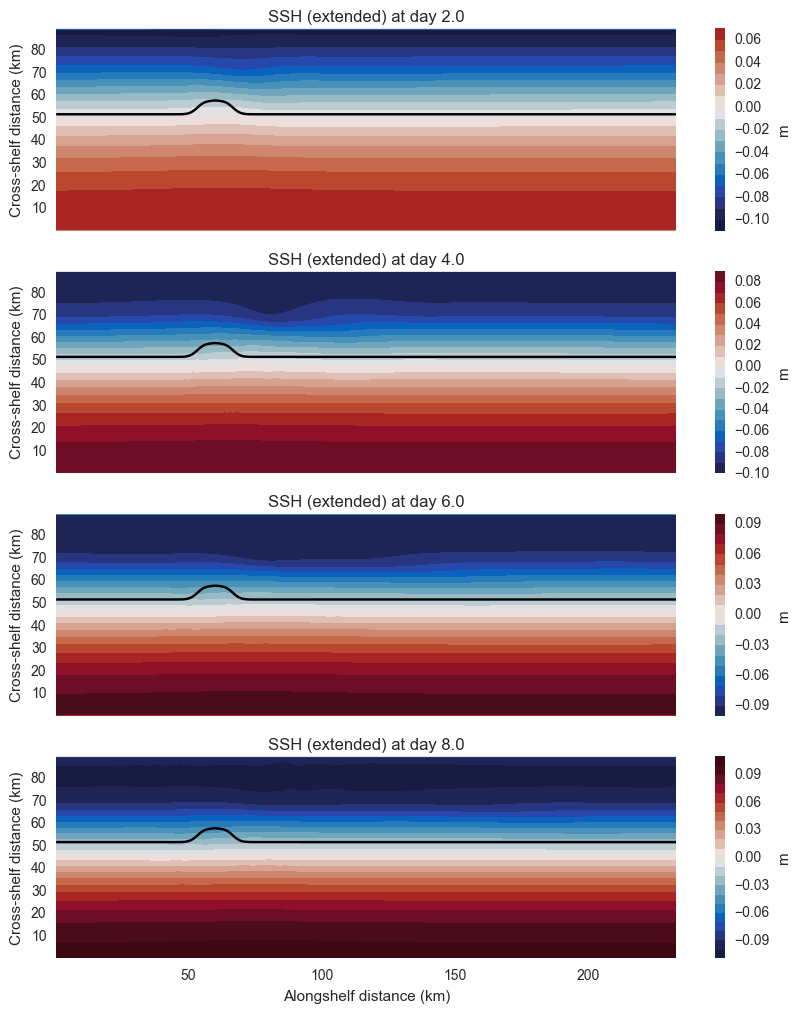

In [61]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    with Dataset(state_ext_path,'r') as state:
        eta_ext = state.variables['Eta'][tt,:,:]
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X_ext,Y_ext,eta_ext[:,:],20,vmin=-0.1, vmax=0.1, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m')
    CSB = ax[ii].contour(X_ext,Y_ext,dep_ext[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('SSH (extended) at day %1.1f' %(tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


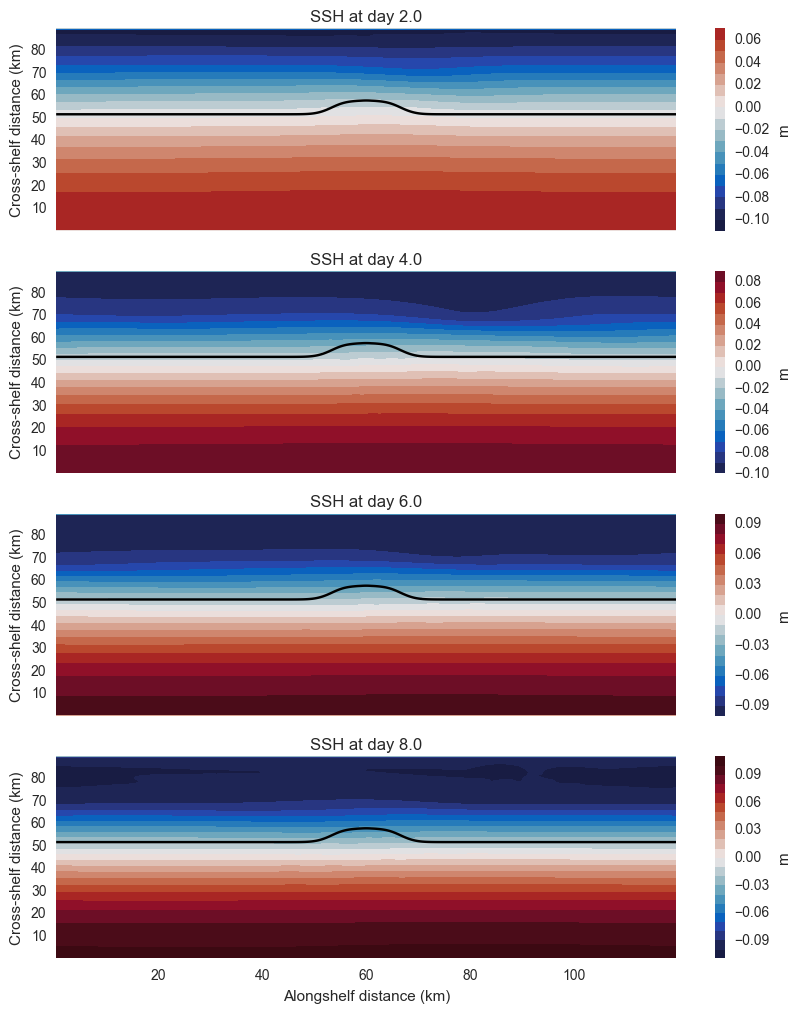

In [59]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    with Dataset(state_base_path,'r') as state:
        eta_base = state.variables['Eta'][tt,:,:]
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X,Y,eta_base[:,:360],20,vmin=-0.1, vmax=0.1, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('SSH at day %1.1f' %(tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


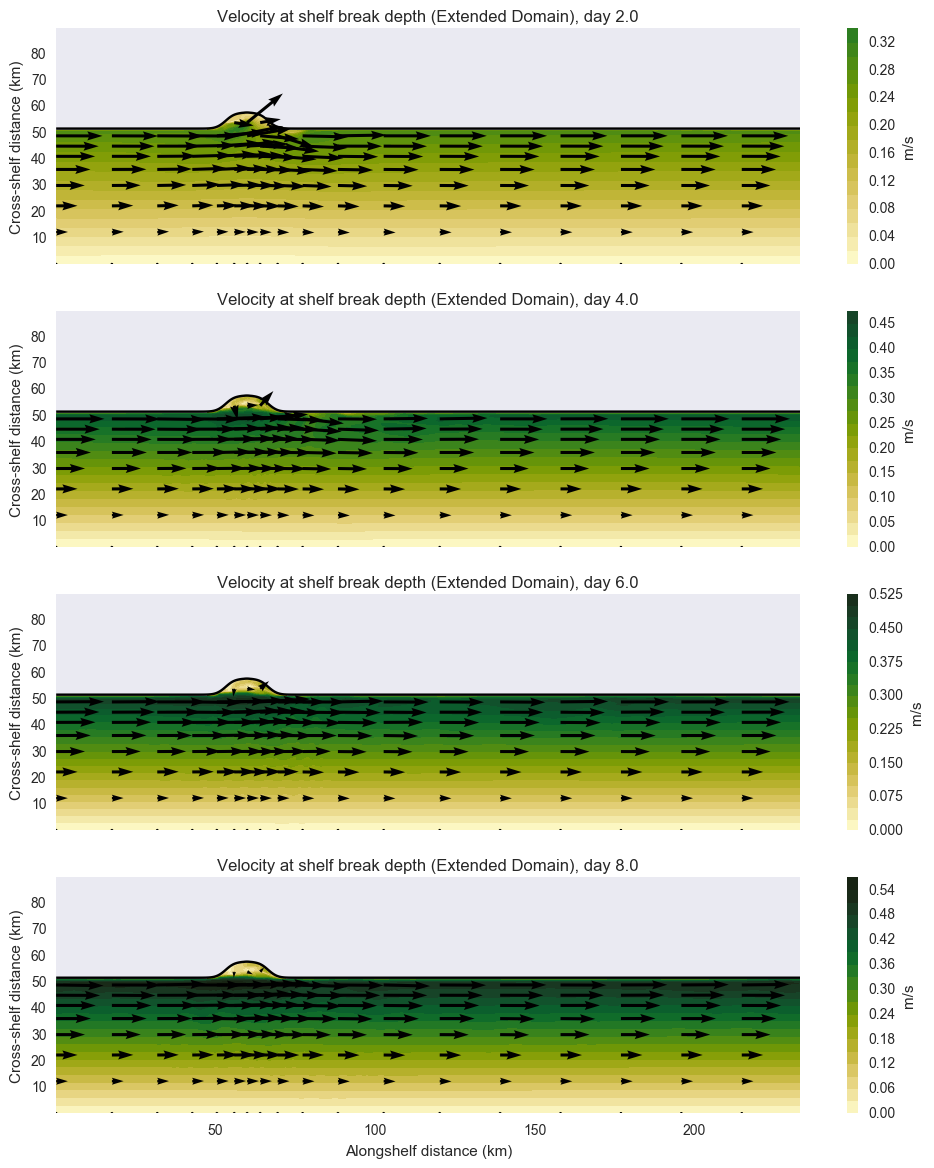

In [29]:
fig, ax = plt.subplots(4,1,figsize=(12,14), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,30,xend=540)
    CF = ax[ii].contourf(X_ext,Y_ext,spd_ext,20, cmap = cmo.cm.speed, vmin=0, vmax=0.54)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X_ext,Y_ext,dep_ext[:,:], levels=[147.5], colors = 'k')
    QV = ax[ii].quiver(X_ext[::30],Y_ext[::30],u_ext[::30,::30],v_ext[::30,::30])
    ax[ii].set_title('Velocity at shelf break depth (Extended Domain), day %1.1f' %(tt/2.))
    ax[ii].set_ylabel('Cross-shelf distance (km)') 

ax[3].set_xlabel('Alongshelf distance (km)')    



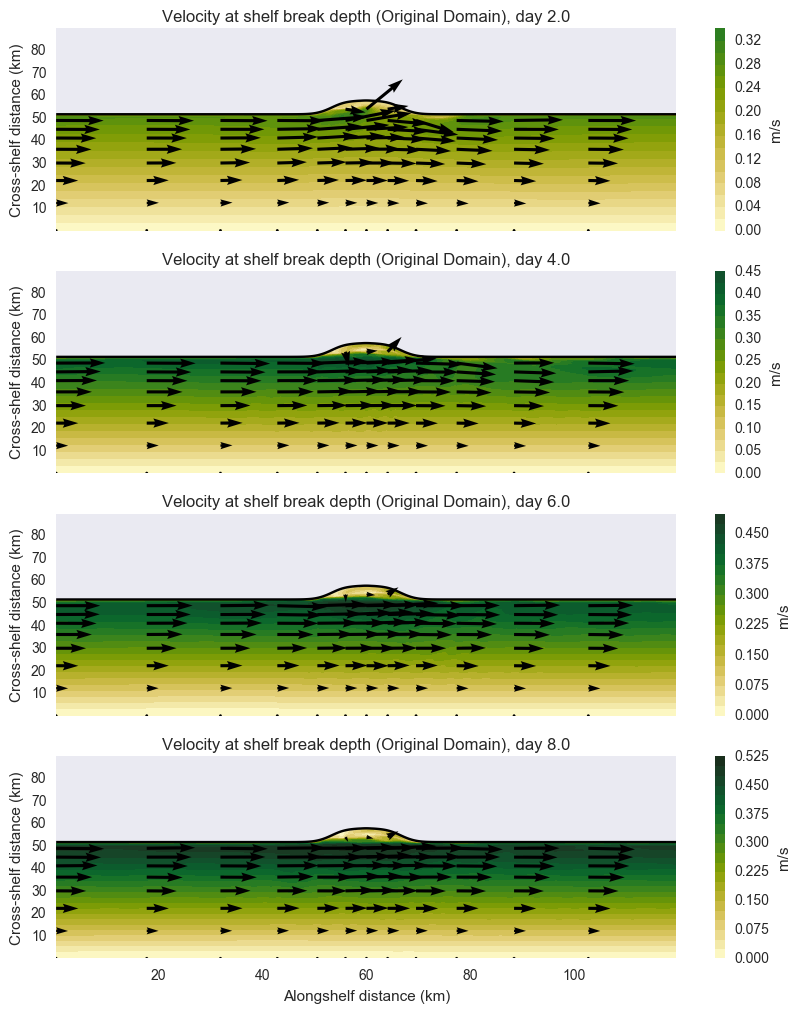

In [35]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,30)
    CF = ax[ii].contourf(X,Y,spd_base,20, cmap = cmo.cm.speed, vmin=0, vmax=0.54)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    QV = ax[ii].quiver(X[::30],Y[::30],u_base[::30,::30],v_base[::30,::30])
    ax[ii].set_title('Velocity at shelf break depth (Original Domain), day %1.1f' %(tt/2.))
    ax[ii].set_ylabel('Cross-shelf distance (km)') 

ax[3].set_xlabel('Alongshelf distance (km)')    


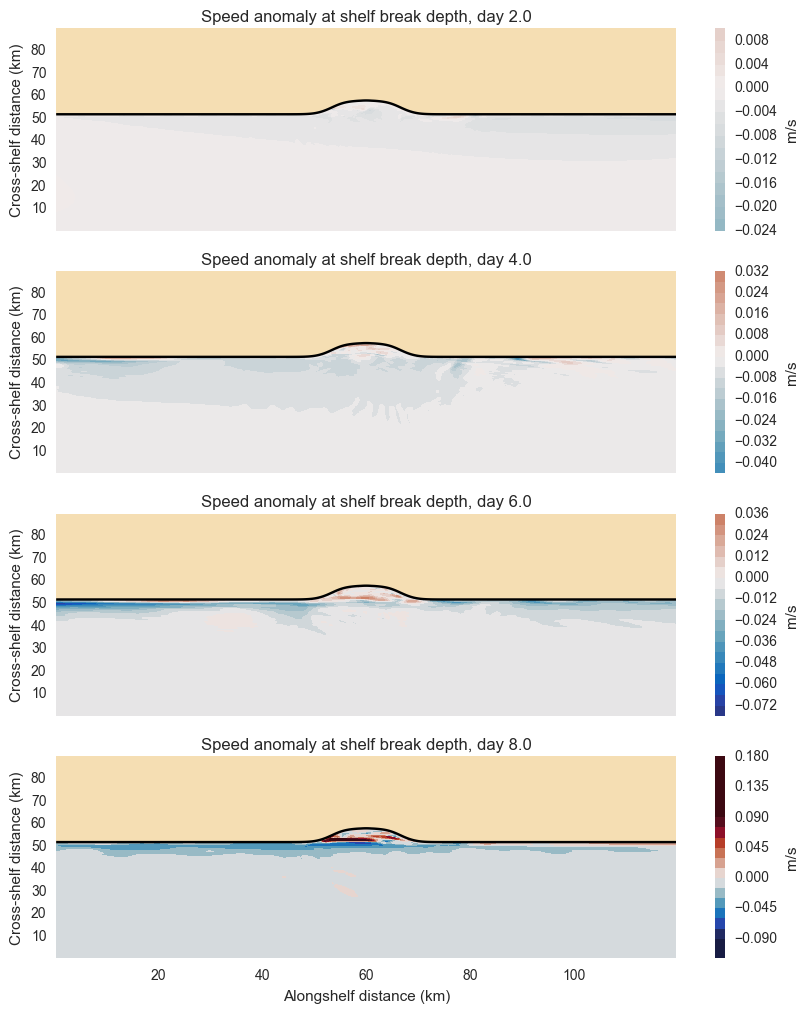

In [48]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,30)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,30)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X,Y,spd_base-spd_ext[:,:360],20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X,Y,dep[:,:], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('Speed anomaly at shelf break depth, day %1.1f' %(tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


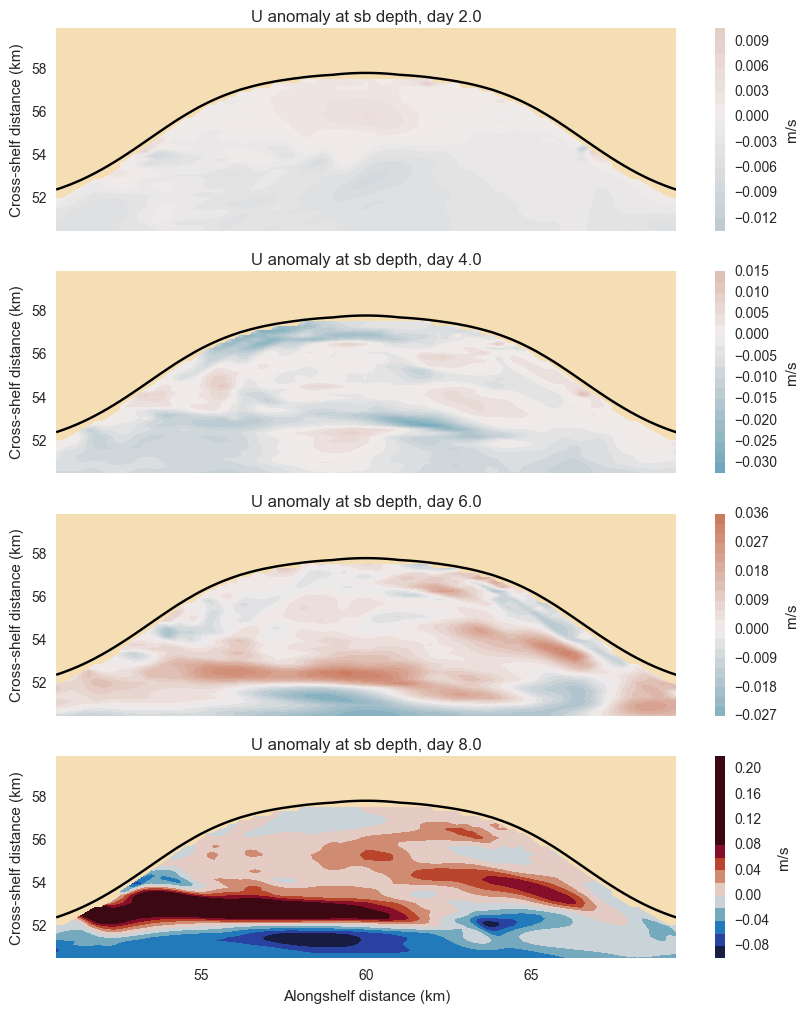

In [52]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,30)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,30)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],u_base[220:270,120:240]-u_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('U anomaly at sb depth, day %1.1f' %(tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


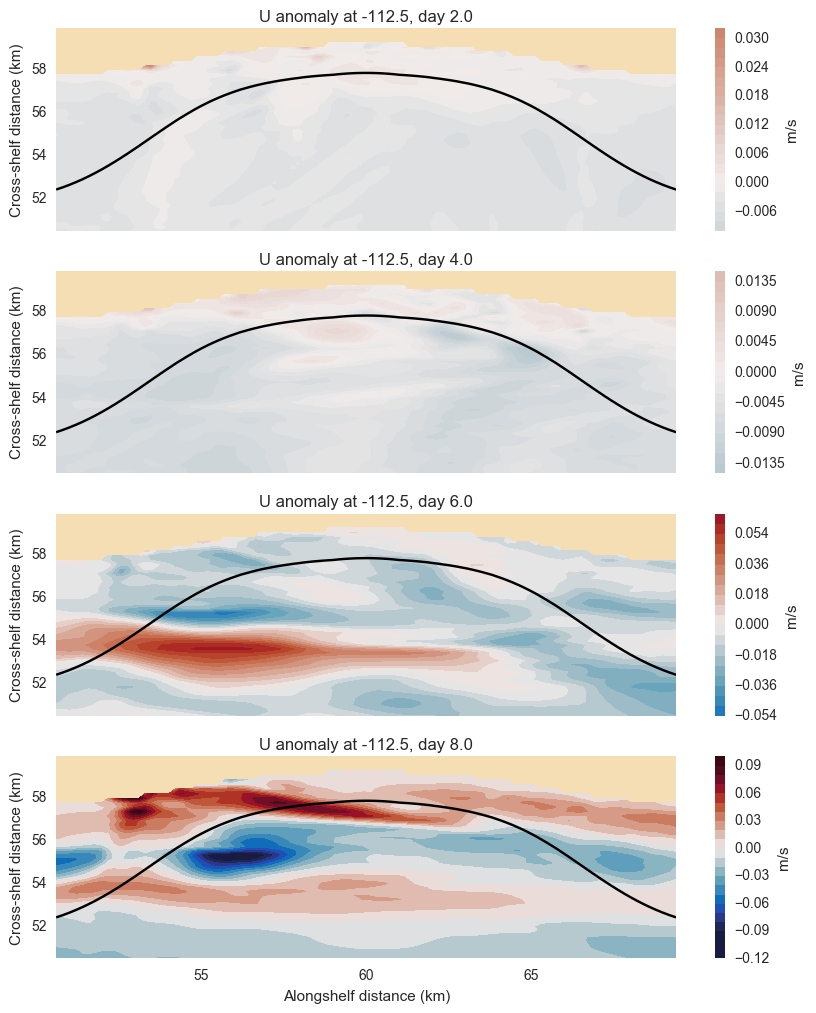

In [53]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,22)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,22)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],u_base[220:270,120:240]-u_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('U anomaly at %1.1f, day %1.1f' %(RC[22],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


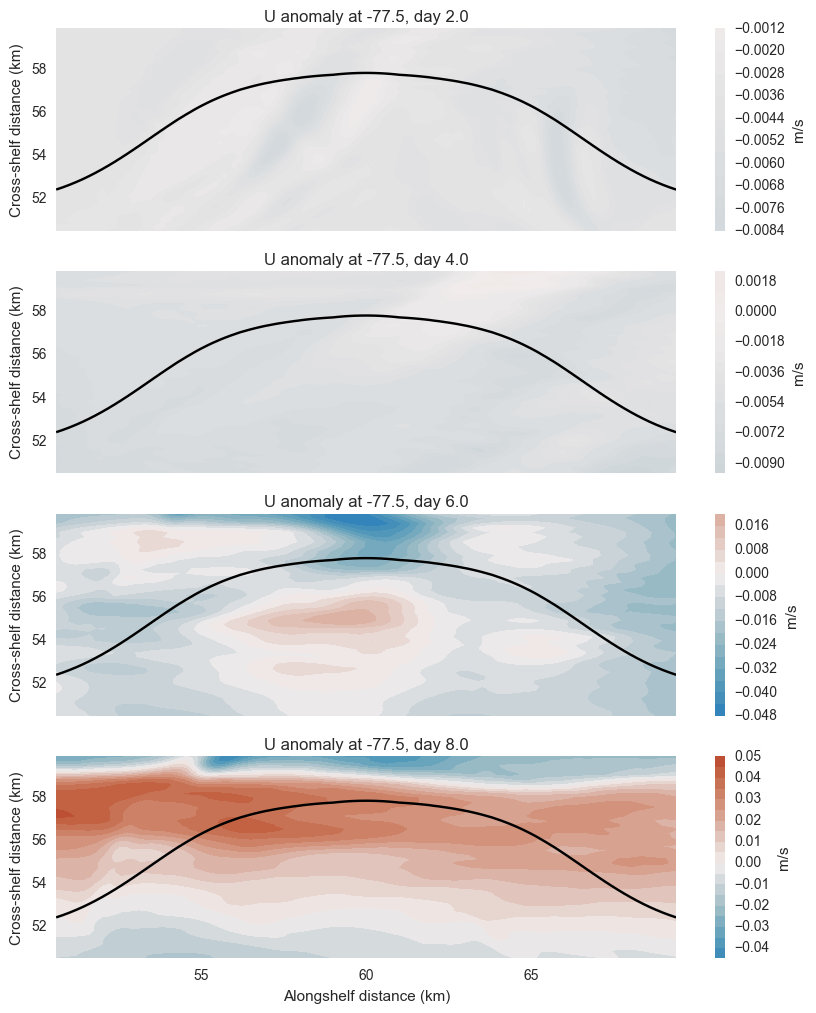

In [54]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,15)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,15)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],u_base[220:270,120:240]-u_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('U anomaly at %1.1f, day %1.1f' %(RC[15],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


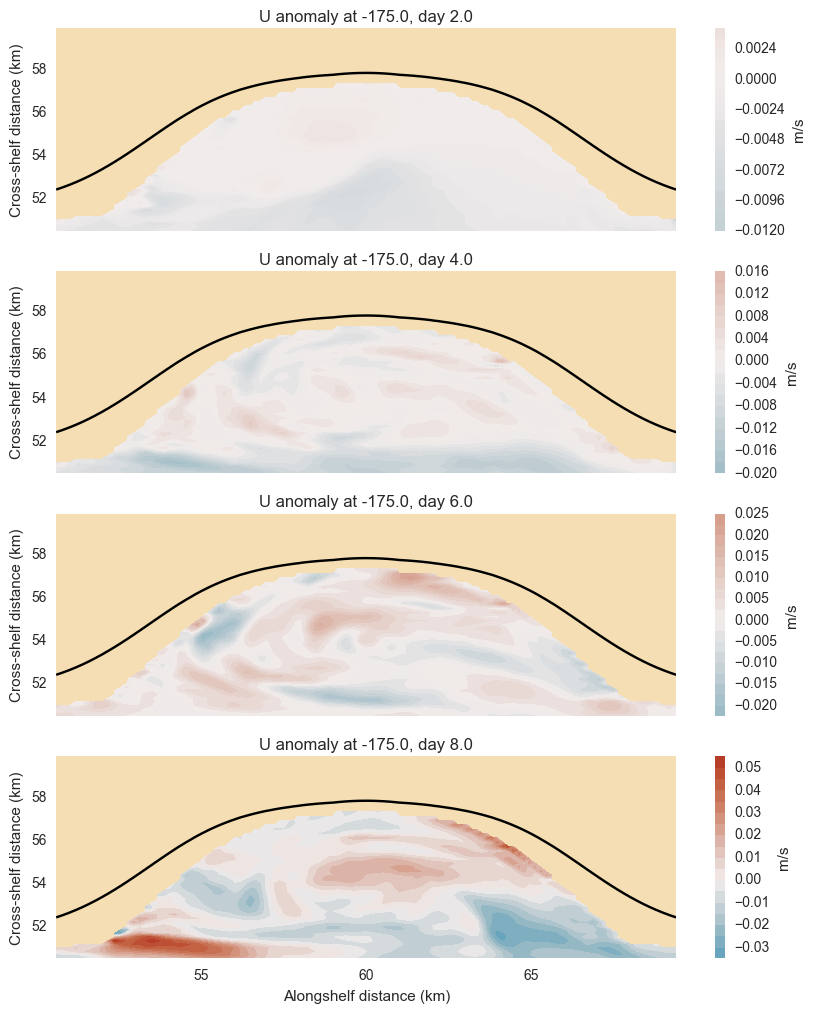

In [72]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,34)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,34)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],u_base[220:270,120:240]-u_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('U anomaly at %1.1f, day %1.1f' %(RC[34],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


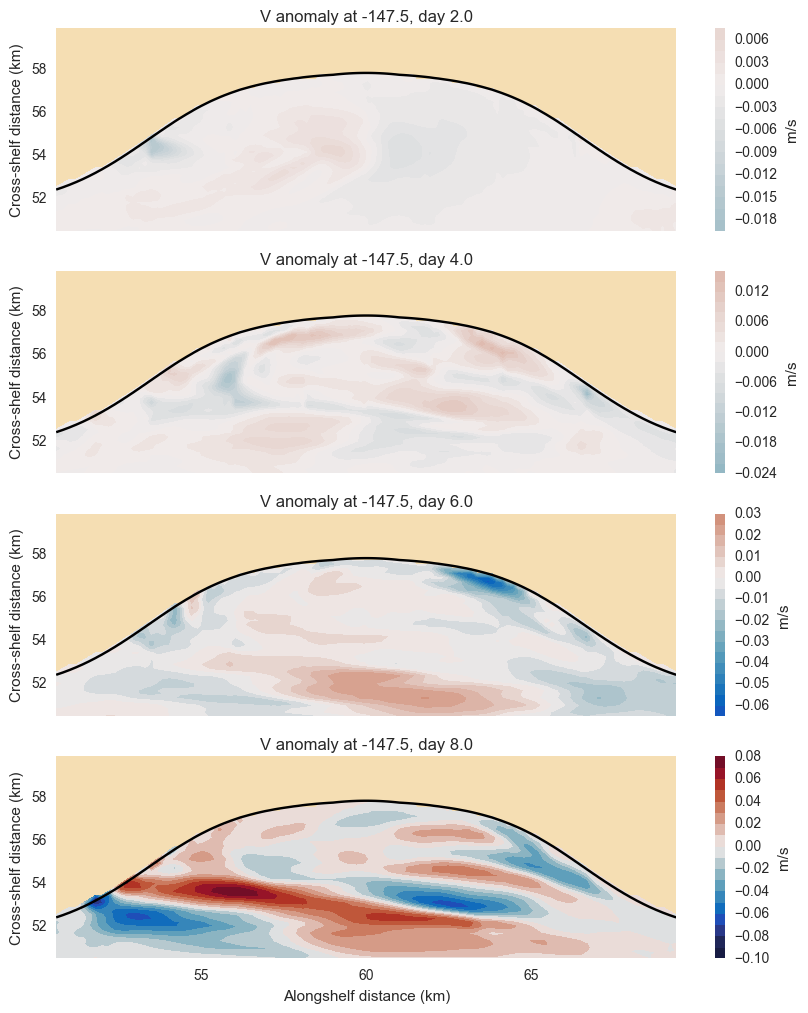

In [66]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,29)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,29)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],v_base[220:270,120:240]-v_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('V anomaly at %1.1f, day %1.1f' %(RC[29],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


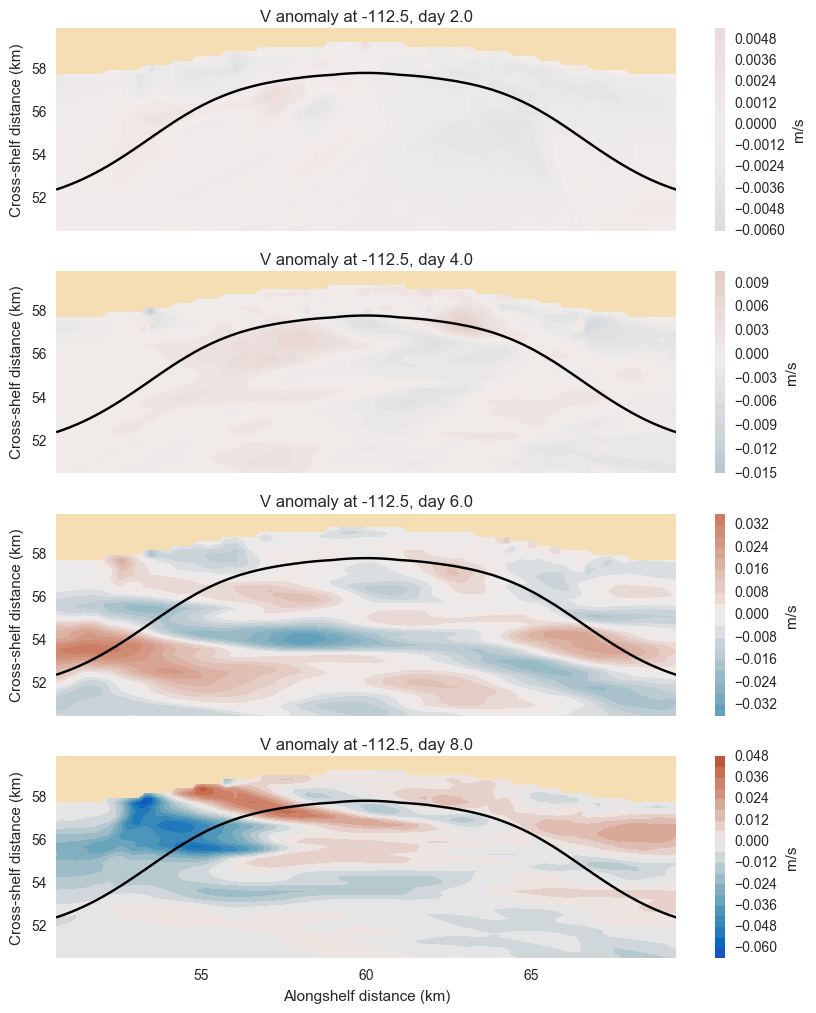

In [68]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,22)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,22)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],v_base[220:270,120:240]-v_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('V anomaly at %1.1f, day %1.1f' %(RC[22],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


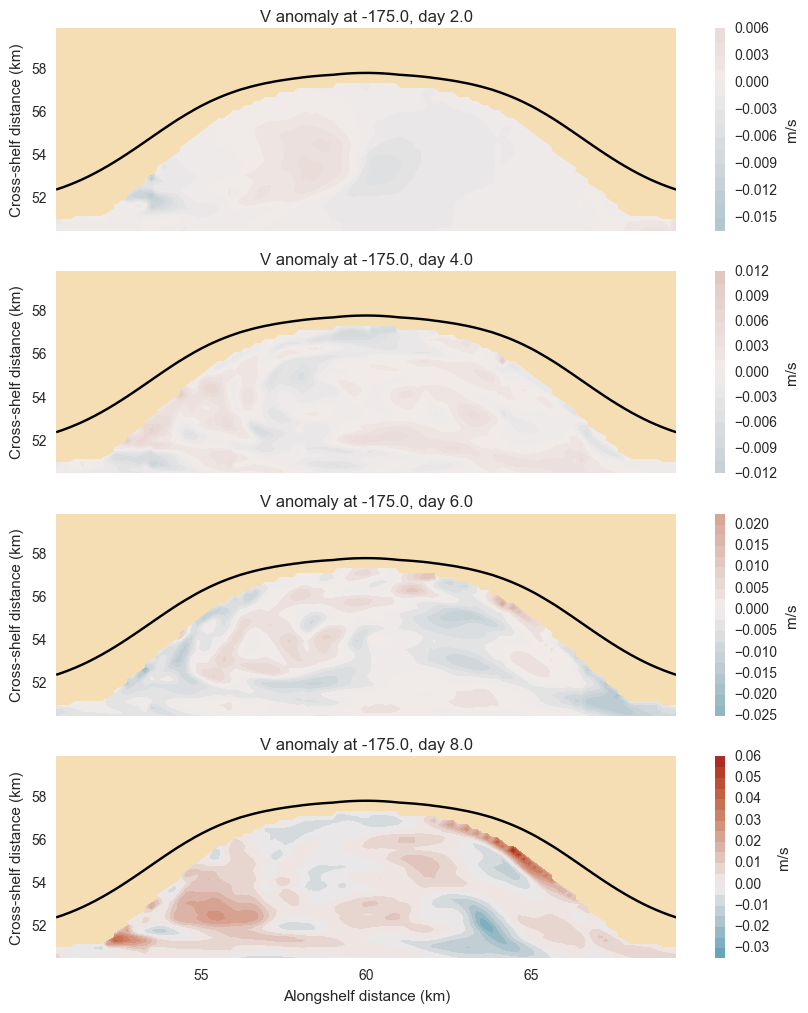

In [69]:
fig, ax = plt.subplots(4,1,figsize=(10,12), sharex = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    u_base, v_base, spd_base = get_vel(state_base_path,tt,34)
    u_ext, v_ext, spd_ext = get_vel(state_ext_path,tt,34)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(X[120:240],Y[220:270],v_base[220:270,120:240]-v_ext[220:270,120:240],
                         20,vmin=-0.09, vmax=0.09, cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label('m/s')
    CSB = ax[ii].contour(X[120:240],Y[220:270],dep[220:270,120:240], levels=[147.5], colors = 'k')
    ax[ii].set_ylabel('Cross-shelf distance (km)')    
    ax[ii].set_title('V anomaly at %1.1f, day %1.1f' %(RC[34],tt/2.))

ax[3].set_xlabel('Alongshelf distance (km)')    


## Isopycnals

In [100]:
def calc_rho(RhoRef, T,S,alpha=2.0E-4, beta=7.4E-4):
    """-----------------------------------------------------------------------------
    calc_rho calculates the density using a linear equation of state.
    
    INPUT:
    RhoRef : reference density at the same z as T and S slices. Can be a scalar or a 
             vector, depending on the size of T and S.
    T, S   : should be a vector (at least 1D)
    alpha = 2.0E-4 # 1/degC, thermal expansion coefficient
    beta = 7.4E-4, haline expansion coefficient
    OUTPUT:
    rho - Density [same shape as T and S]
    -----------------------------------------------------------------------------"""
    
    #Linear eq. of state 
    rho = RhoRef*(np.ones(np.shape(T)) - alpha*(T) + beta*(S))
    return rho

def call_rho(path,tt,zini,zend,xini,xend,yini,yend):
    RhoRef = 999.79998779
    with Dataset(path,'r') as state:
        T = state.variables['Temp'][tt,zini:zend,yini:yend,xini:xend]
        S = state.variables['S'][tt,zini:zend,yini:yend,xini:xend]
    rho = calc_rho(RhoRef,T,S,alpha=2.0E-4, beta=7.4E-4)
    return(np.ma.masked_array(rho,mask = mask_ext[zini:zend,yini:yend,xini:xend])) 
   

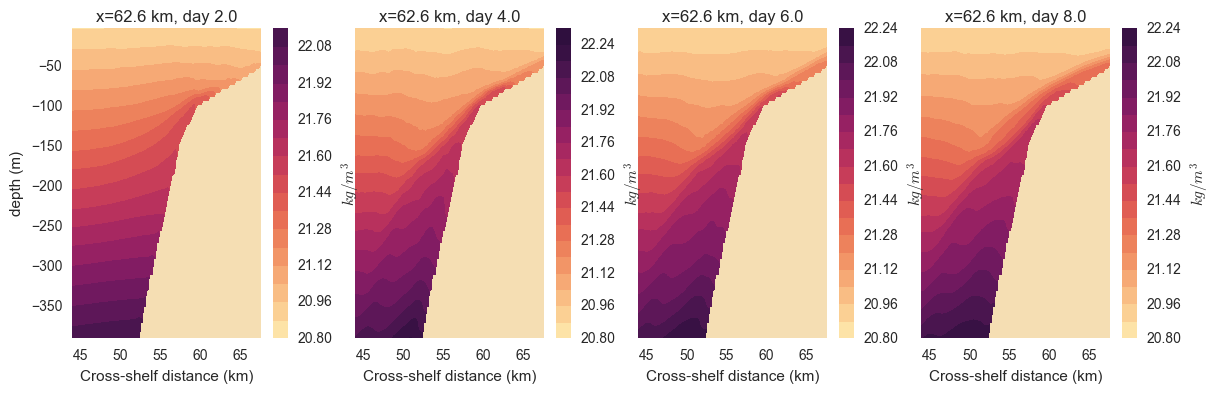

In [119]:
fig, ax = plt.subplots(1,4,figsize=(14,4), sharey = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    rho_base = call_rho(state_base_path,tt,0,50,200,201,170,300)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(Y[170:300],RC[0:50],rho_base.squeeze()-999.79998779,20,
                         vmin=20.80,vmax=22.24, cmap = cmo.cm.matter)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label(r'$kg/m^3$')
    ax[ii].set_xlabel('Cross-shelf distance (km)')    
    ax[ii].set_title('x=%1.1f km, day %1.1f' %(X[200],tt/2.))

ax[0].set_ylabel('depth (m)')    


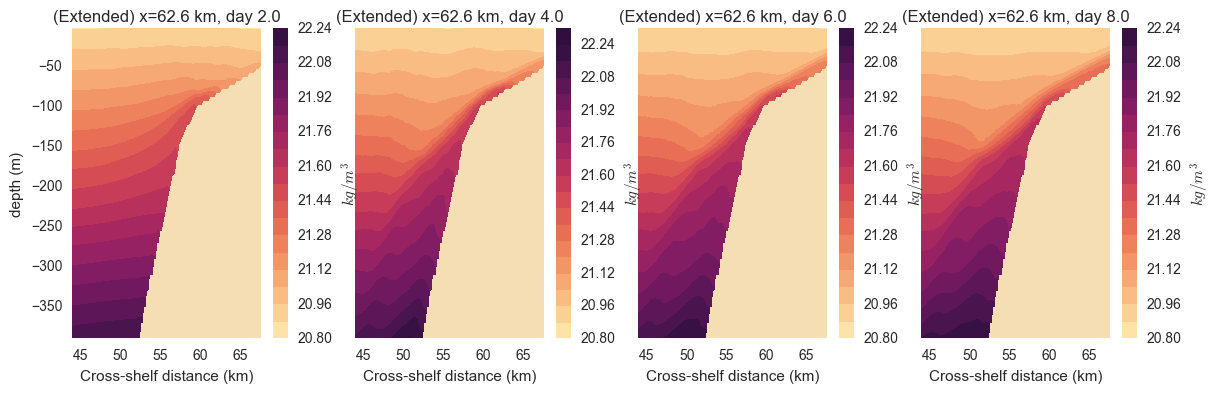

In [121]:
fig, ax = plt.subplots(1,4,figsize=(14,4), sharey = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    rho_ext = call_rho(state_ext_path,tt,0,50,200,201,170,300)
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(Y[170:300],RC[0:50],rho_ext.squeeze()-999.79998779,20,
                         vmin=20.80,vmax=22.24, cmap = cmo.cm.matter)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label(r'$kg/m^3$')
    ax[ii].set_xlabel('Cross-shelf distance (km)')    
    ax[ii].set_title('(Extended) x=%1.1f km, day %1.1f' %(X[200],tt/2.))

ax[0].set_ylabel('depth (m)')    


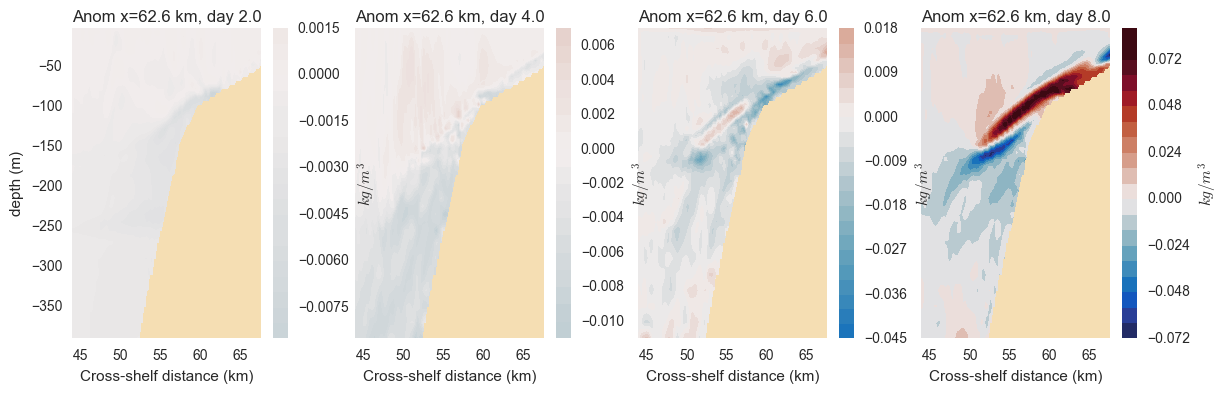

In [127]:
fig, ax = plt.subplots(1,4,figsize=(14,4), sharey = True)

times = [4,8,12,16]

for ii,tt in zip(range(len(ax)),times):
    rho_base = call_rho(state_base_path,tt,0,50,200,201,170,300)
    rho_ext = call_rho(state_ext_path,tt,0,50,200,201,170,300)
    
    ax[ii].set_axis_bgcolor("wheat")
    CF = ax[ii].contourf(Y[170:300],RC[0:50],rho_base.squeeze()-rho_ext.squeeze(),20,
                         vmin=-0.075,vmax=0.075,
                         cmap = cmo.cm.balance)
    CB = plt.colorbar(CF,ax=ax[ii])
    CB.set_label(r'$kg/m^3$')
    ax[ii].set_xlabel('Cross-shelf distance (km)')    
    ax[ii].set_title('Anom x=%1.1f km, day %1.1f' %(X[200],tt/2.))

ax[0].set_ylabel('depth (m)')    
